In [ ]:
%load_ext cython 

In [ ]:
%%cython 
 
import numpy as np  
import matplotlib.pyplot as plt
from libc.math cimport exp,abs 

cdef float f (float x):
  return -x

cdef float g (float x):
  return exp(-x)

cdef firstordereuler (float initial_condition,float (*f)(float),float h,float simu_time,float unit_time,float sampling_time):
  cdef float x=initial_condition
  cdef int N=int(simu_time/(h*unit_time))
  l=[]
  cdef int i 
  for i in range(N):
    x+=h*f(x)
    if i%sampling_time==0:
      l.append(x)
  cdef float error=abs(initial_condition*g(i*h)-x)
  return error,l 

cdef float R=3000.0
cdef float C=10.0**(-6)
cdef float V=10**6
cdef float t=5*10.0**(-3)
cdef float Q0=0
cdef float reduced_t=R*C
cdef float reduced_Q0=Q0-C*V

cdef int sampling_time=10
H=np.logspace(-9, -1, num=100,base=10.0)
#H=[10.0**(-4)] #for plotting q-time plot 
e_list=np.zeros(np.shape(H)[0])

for counter,h in enumerate(H):
  e_list[counter]=firstordereuler(reduced_Q0,f,h,t,reduced_t,sampling_time)[0]
  #l=firstordereuler(reduced_Q0,f,h,t,reduced_t,sampling_time)[1] #for plotting q-time plot 

#plotting q vs time: 

#plt.plot(np.arange(np.shape(l)[0])*sampling_time*h*R*C,np.array(l)+C*V)
#plt.title('charge vs time for charging capacitor: Euler method \n h=%.4f'%h)
#plt.xlabel('t(s)')
#plt.ylabel('q(c)')
#plt.savefig('q-t.png')


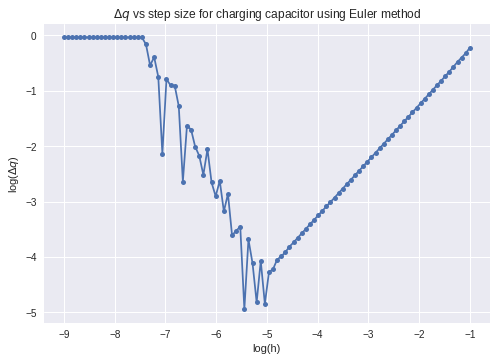

In [ ]:
#plotting error vs h:

plt.style.use('seaborn')
plt.plot(np.log10(H),np.log10(e_list),'-o',ms=5)
plt.xlabel('log(h)')
plt.ylabel('log($\Delta q$)')
plt.title('$\Delta q$ vs step size for charging capacitor using Euler method')
plt.savefig('deltaq-error.png',bbox_inches='tight')
plt.show()
